In [25]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Baasic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
import datetime as dt
from math import radians, cos, sin, asin, sqrt

In [67]:
#### Loading the Data
data = pd.read_excel('sales.xlsx')
data = data[data.Category=='Furniture']
data = data.drop('Category',1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 9727
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Row ID                 2067 non-null   int64         
 1   Order ID               2067 non-null   object        
 2   Order Date             2067 non-null   datetime64[ns]
 3   Ship Date              2067 non-null   datetime64[ns]
 4   Ship Mode              2067 non-null   object        
 5   Customer ID            2067 non-null   object        
 6   Customer Name          2067 non-null   object        
 7   Segment                2067 non-null   object        
 8   Country                2067 non-null   object        
 9   City                   2067 non-null   object        
 10  State                  2067 non-null   object        
 11  Postal Code            2067 non-null   int64         
 12  Region                 2067 non-null   object        
 13  Pro

In [68]:
data_fur = data[data['Sub-Category']=='Furnishings']
data_fur = data_fur[['Order Date','Quantity']]

In [81]:
data_fur.info()
data_fur1 = data_fur.groupby(pd.Grouper(key='Order Date', freq='1M')).sum()
#data_fur1=data_fur1.reset_index()
data_fur1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 5 to 9727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  932 non-null    datetime64[ns]
 1   Quantity    932 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 21.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2014-04-30 to 2017-12-31
Freq: M
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Quantity  45 non-null     int64
dtypes: int64(1)
memory usage: 720.0 bytes


<AxesSubplot:xlabel='Order Date'>

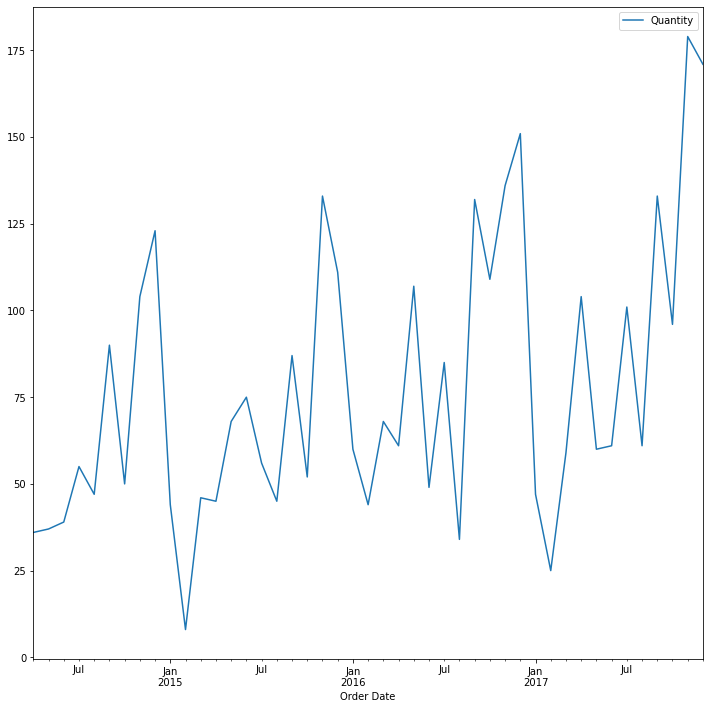

In [70]:
data_fur1.plot.line(y='Quantity')

In [71]:
data_fur1_train = data_fur1[:-9]
data_fur1_test = data_fur1[-9:]

In [106]:
# k_seasonal_diff=True, seasonal_periods=12 since there is a cycle every 12 months.
from statsmodels.tsa.statespace.tools import diff 
diff_data_fur1_train=diff(data_fur1_train, k_diff=0, k_seasonal_diff=True, seasonal_periods=12)
diff_data_fur1_train

,Quantity
Order Date,
2015-04-30,9.0
2015-05-31,31.0
2015-06-30,36.0
2015-07-31,1.0
2015-08-31,-2.0
2015-09-30,-3.0
2015-10-31,2.0
2015-11-30,29.0
2015-12-31,-12.0


<AxesSubplot:xlabel='Order Date'>

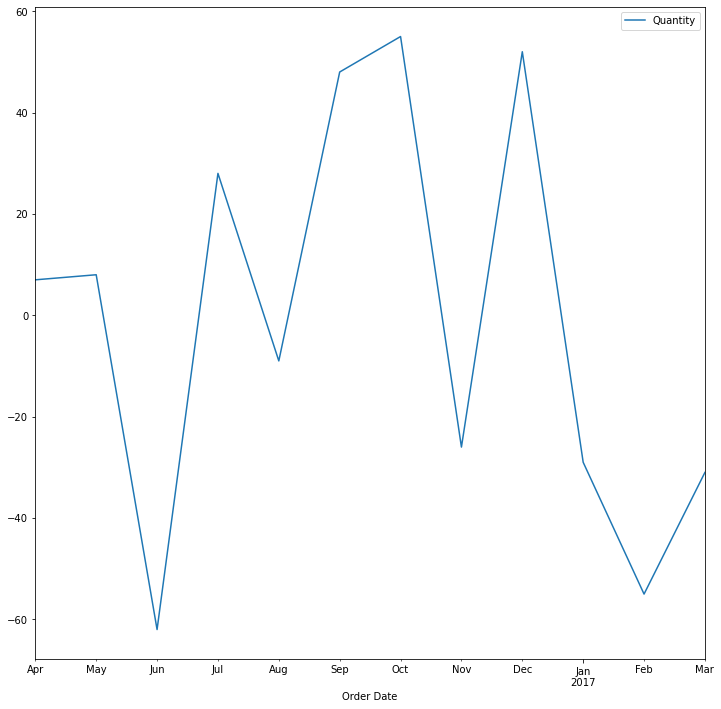

In [105]:
diff_data_fur1_train.plot.line(y='Quantity')

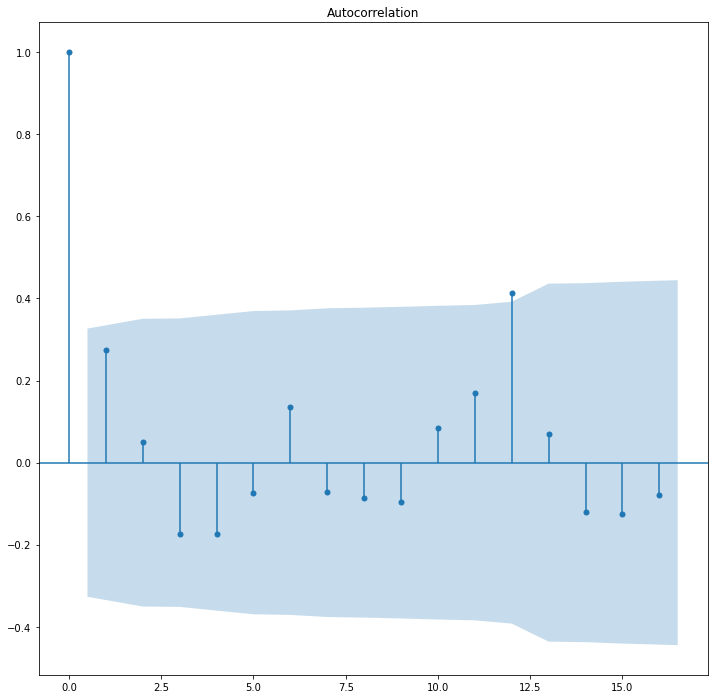

In [98]:
from statsmodels.graphics.tsaplots import acf
plot_acf(data_fur1_train['Quantity'])
plt.show()

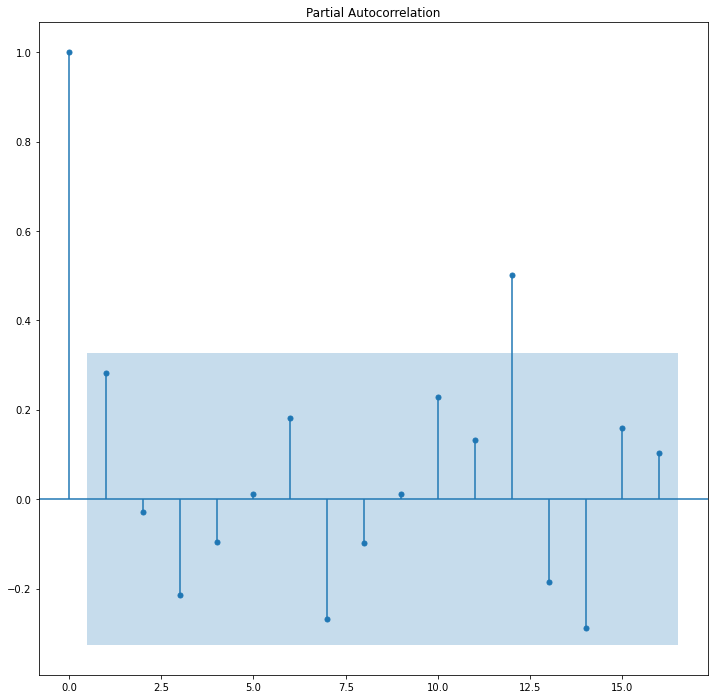

In [99]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_fur1_train['Quantity'])
plt.show()

In [100]:
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(data_fur1_train, order=(0,0,0),seasonal_order=(1,1,1,12))
res = mod.fit()
y_predict = res.forecast(9)

C:\Users\praca\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<ipython-input-101-878a4c358172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fur1_test['y_predict'] = y_predict


<AxesSubplot:xlabel='Order Date'>

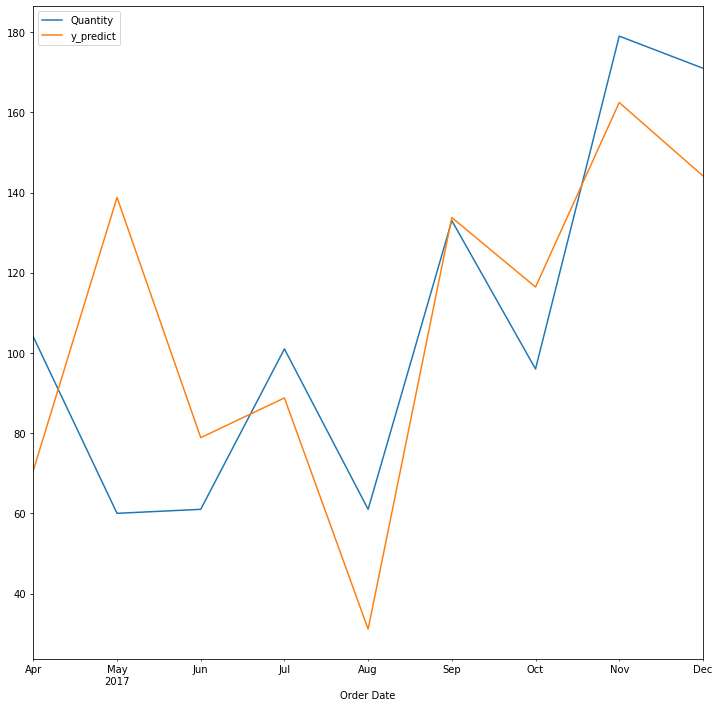

In [101]:
data_fur1_test['y_predict'] = y_predict
data_fur1_test[['Quantity','y_predict']].plot.line()

In [102]:
from sklearn.metrics import mean_squared_error
RMSE = sqrt(mean_squared_error(data_fur1_test.Quantity.values, y_predict))
print(RMSE)

33.48682640544308
